In [1]:
library('tidyverse')
library('patchwork')

org_opts <- options()

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
metadata_tbl <-
    read_csv('metadata.csv') %>%
    mutate(
        `display_alt_name`=case_when(
            `display_name` == 'post-REP Conv' ~ 'Unengineered (REP)',
            `display_name` == 'post-REP CytoTIL15' ~ 'CytoTIL15 (REP)',
            TRUE ~ `display_name`
        ),
        `treatment_alt`=case_when(
            `treatment` == 'Conventional' ~ 'Unengineered',
            TRUE ~ `treatment`
        )
    )

metadata_tbl

Rows: 6 Columns: 5
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): donor, sample_name, display_name, stage, treatment

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


donor,sample_name,display_name,stage,treatment,display_alt_name,treatment_alt
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
OBS-006,OBS-006-001,Tumor digest,Tumor digest,None,Tumor digest,None
OBS-006,OBS-006-002,pre-REP,pre-REP,None,pre-REP,None
OBS-006,OBS-006-003,post-REP Conv,post-REP,Conventional,Unengineered (REP),Unengineered
OBS-006,OBS-006-004,post-REP CytoTIL15,post-REP,CytoTIL15,CytoTIL15 (REP),CytoTIL15
OBS-006,OBS-006-005,PDx Conv,PDX TIL,Conventional,PDx Conv,Unengineered
OBS-006,OBS-006-007,PDx CytoTIL15,PDX TIL,CytoTIL15,PDx CytoTIL15,CytoTIL15


In [3]:
all_freq_tbl <-
    bind_rows(
        read_csv('fraction_positive-001.csv'),
        read_csv('fraction_positive-002.csv'),
        read_csv('fraction_positive-003vs004.csv')
    ) %>%
    left_join(metadata_tbl, by='sample_name') %>%
    mutate(
        `stage`=fct_relevel(`stage`, 'Tumor digest', 'pre-REP', 'post-REP'),
        `display_name`=factor(`display_name`, levels=metadata_tbl$`display_name`)
    )
    

all_freq_tbl %>%
    head(10)

Rows: 15991 Columns: 5
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): sample_name, gene
dbl (3): no_of_cells, no_of_pos_cells, frac_of_pos_cells

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 16547 Columns: 5
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): sample_name, gene
dbl (3): no_of_cells, no_of_pos_cells, frac_of_pos_cells

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 33280 Columns: 5
── Column specification ─

sample_name,gene,no_of_cells,no_of_pos_cells,frac_of_pos_cells,donor,display_name,stage,treatment,display_alt_name,treatment_alt
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<chr>,<chr>,<chr>
OBS-006-001,A1BG,1348,165,0.1224035608,OBS-006,Tumor digest,Tumor digest,None,Tumor digest,None
OBS-006-001,A2M,1348,104,0.0771513353,OBS-006,Tumor digest,Tumor digest,None,Tumor digest,None
OBS-006-001,A2ML1,1348,2,0.0014836795,OBS-006,Tumor digest,Tumor digest,None,Tumor digest,None
OBS-006-001,A3GALT2,1348,1,0.0007418398,OBS-006,Tumor digest,Tumor digest,None,Tumor digest,None
OBS-006-001,A4GALT,1348,4,0.0029673591,OBS-006,Tumor digest,Tumor digest,None,Tumor digest,None
OBS-006-001,AAAS,1348,53,0.0393175074,OBS-006,Tumor digest,Tumor digest,None,Tumor digest,None
OBS-006-001,AACS,1348,27,0.0200296736,OBS-006,Tumor digest,Tumor digest,None,Tumor digest,None
OBS-006-001,AADAC,1348,1,0.0007418398,OBS-006,Tumor digest,Tumor digest,None,Tumor digest,None
OBS-006-001,AADACL2,1348,1,0.0007418398,OBS-006,Tumor digest,Tumor digest,None,Tumor digest,None


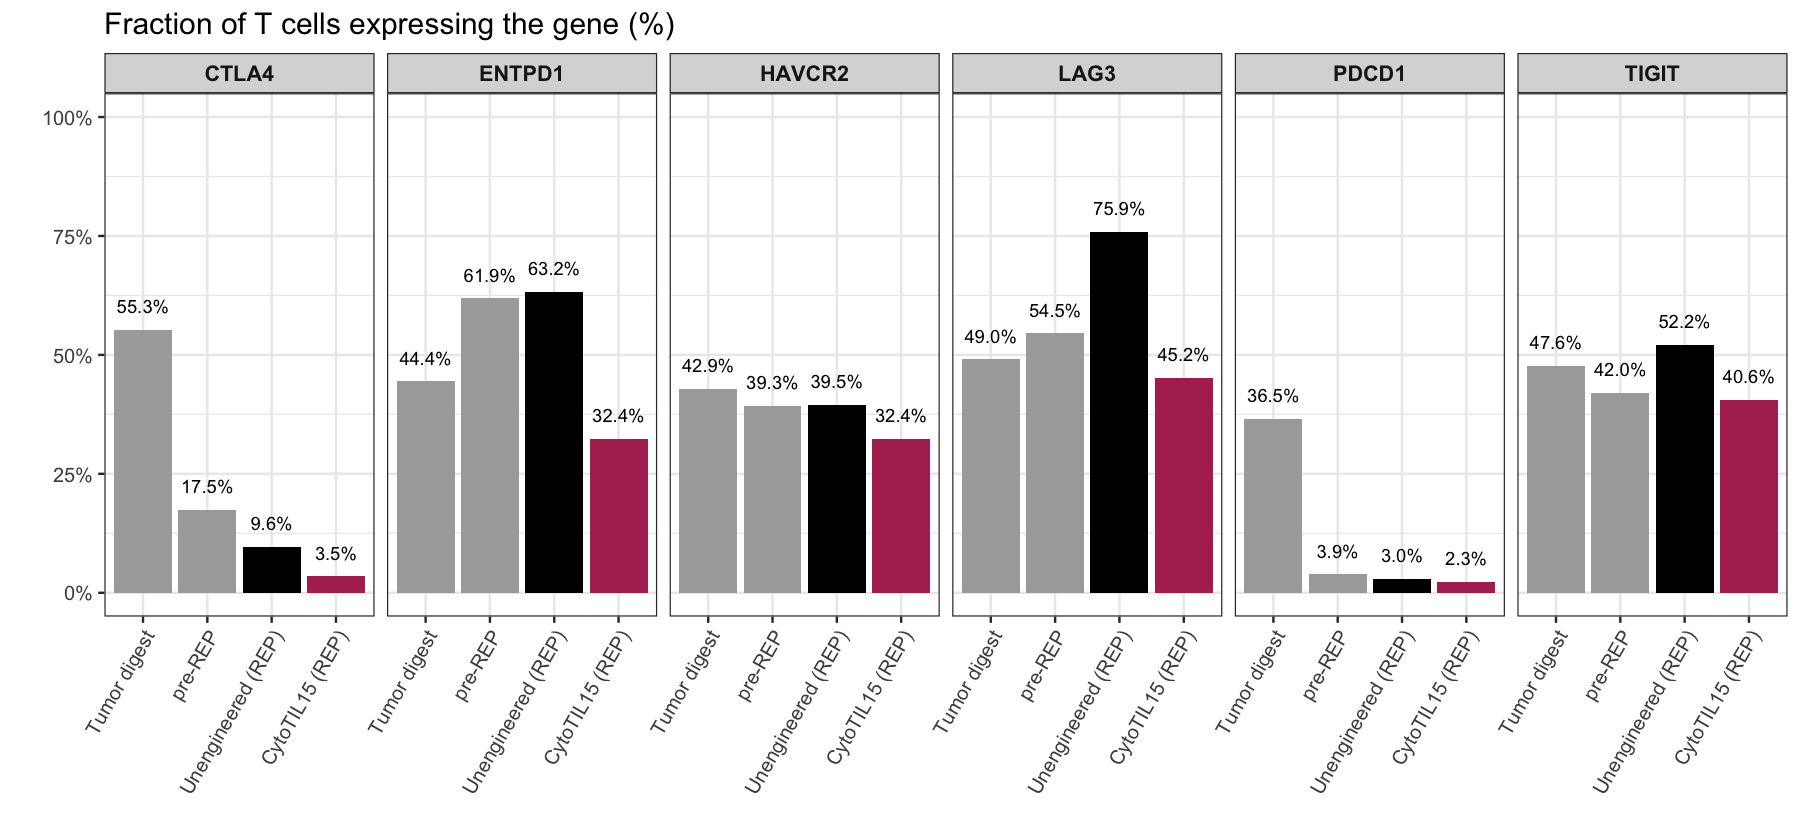

In [4]:
options(repr.plot.width=15, repr.plot.height=7)

all_freq_tbl %>%
    filter(`gene` %in% c('TIGIT', 'PDCD1', 'LAG3', 'CTLA4', 'HAVCR2', 'ENTPD1')) %>%
    ggplot(aes(x=`display_alt_name`, y=`frac_of_pos_cells`, fill=`treatment_alt`)) +
        geom_col() +
        geom_text(
            aes(
                label=scales::percent(`frac_of_pos_cells`, accuracy=0.1),
                y=`frac_of_pos_cells` + 0.05
            )
        ) +
        facet_wrap(~`gene`, nrow=1) +
        scale_y_continuous(labels=scales::percent , limits=c(0, 1)) +
        scale_x_discrete(limits=c('Tumor digest', 'pre-REP', 'Unengineered (REP)', 'CytoTIL15 (REP)')) +
        scale_fill_manual(values=c('maroon', 'darkgray', 'black')) +
        labs(
            x='',
            title='Fraction of T cells expressing the gene (%)',
            y=''
        ) +
        theme_bw(base_size=15) +
        theme(
            axis.text.x=element_text(angle=60, vjust=1, hjust=1),
            strip.text=element_text(face="bold", size=13),
            legend.position='none'
        )

options(org_opts)

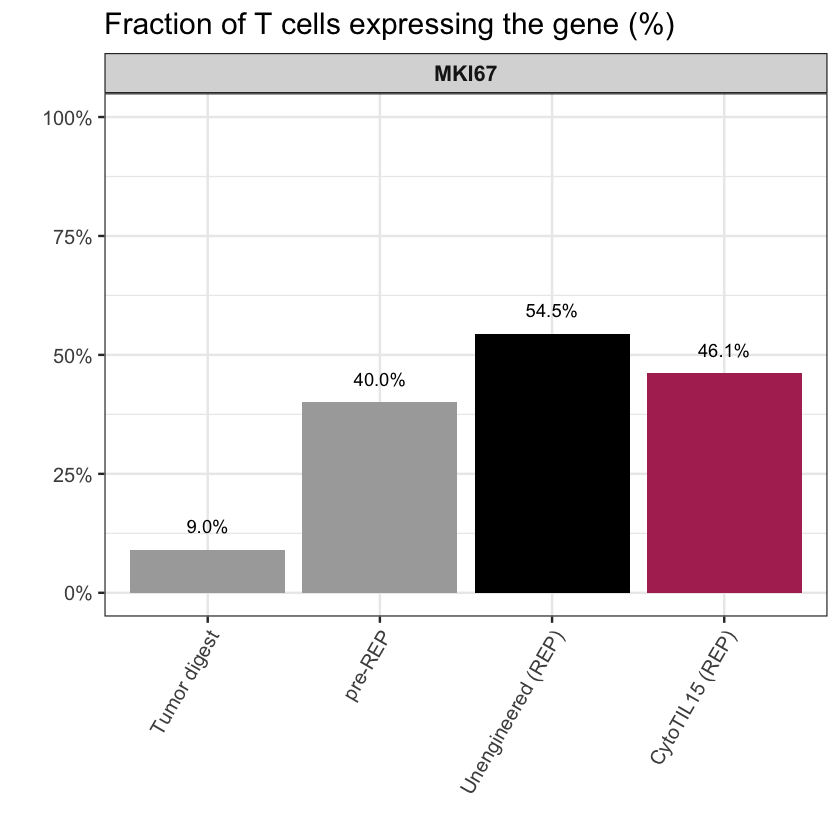

In [5]:
all_freq_tbl %>%
    filter(`gene` %in% c('MKI67')) %>%
    ggplot(aes(x=`display_alt_name`, y=`frac_of_pos_cells`, fill=`treatment_alt`)) +
        geom_col() +
        geom_text(
            aes(
                label=scales::percent(`frac_of_pos_cells`, accuracy=0.1),
                y=`frac_of_pos_cells` + 0.05
            )
        ) +
        facet_wrap(~`gene`, nrow=1) +
        scale_y_continuous(labels=scales::percent , limits=c(0, 1)) +
        scale_x_discrete(limits=c('Tumor digest', 'pre-REP', 'Unengineered (REP)', 'CytoTIL15 (REP)')) +
        scale_fill_manual(values=c('maroon', 'darkgray', 'black')) +
        labs(
            x='',
            title='Fraction of T cells expressing the gene (%)',
            y=''
        ) +
        theme_bw(base_size=15) +
        theme(
            axis.text.x=element_text(angle=60, vjust=1, hjust=1),
            strip.text=element_text(face="bold", size=13),
            legend.position='none'
        )